# EDA of Beta to ETH - no rolling (2021)

In [1]:
import pandas as pd
import seaborn as sns

from utils.alpha_utils import create_alpha
from utils.jupyter_utils import (
    show_kde,
    show_alpha_vs_beta,
    show_timeseries_plot,
    show_beta_distribution_box_plot,
)

In [2]:
# Fetch data from 01.01.2021 to 01.01.2022 (1 full year)
alpha_2021 = create_alpha(period_start=2021, period_end=2022, use_rolling=False)

15-08-2024 09:30:47 - COW19269-USD: Data doesn't exist for startDate = 1609459200, endDate = 1640995200
15-08-2024 09:30:47 - SUI20947-USD: Data doesn't exist for startDate = 1609459200, endDate = 1640995200
15-08-2024 09:30:47 - AXL17799-USD: Data doesn't exist for startDate = 1609459200, endDate = 1640995200
15-08-2024 09:30:47 - ENA-USD: Data doesn't exist for startDate = 1609459200, endDate = 1640995200
15-08-2024 09:30:47 - NOT-USD: Data doesn't exist for startDate = 1609459200, endDate = 1640995200
15-08-2024 09:30:47 - MOG-USD: Data doesn't exist for startDate = 1609459200, endDate = 1640995200
15-08-2024 09:30:47 - ONDO-USD: Data doesn't exist for startDate = 1609459200, endDate = 1640995200
15-08-2024 09:30:47 - MANTA-USD: Data doesn't exist for startDate = 1609459200, endDate = 1640995200
15-08-2024 09:30:47 - OP-USD: Data doesn't exist for startDate = 1609459200, endDate = 1640995200
15-08-2024 09:30:47 - AEVO-USD: Data doesn't exist for startDate = 1609459200, endDate = 164

$SWISE-USD: possibly delisted; No price data found  (1d 2021-12-31 00:00:00+00:00 -> 2022-01-01 00:00:00+00:00)


15-08-2024 09:31:04 - COW19269-USD: Data doesn't exist for startDate = 1640908800, endDate = 1640995200
15-08-2024 09:31:07 - AXL17799-USD: Data doesn't exist for startDate = 1640908800, endDate = 1640995200
15-08-2024 09:31:11 - KAS-USD: Data doesn't exist for startDate = 1640908800, endDate = 1640995200
15-08-2024 09:31:13 - ONDO-USD: Data doesn't exist for startDate = 1640908800, endDate = 1640995200
15-08-2024 09:31:13 - WBT-USD: Data doesn't exist for startDate = 1640908800, endDate = 1640995200
15-08-2024 09:31:14 - BRETT29743-USD: Data doesn't exist for startDate = 1640908800, endDate = 1640995200
15-08-2024 09:31:14 - PYTH-USD: Data doesn't exist for startDate = 1640908800, endDate = 1640995200
15-08-2024 09:31:17 - JUP29210-USD: Data doesn't exist for startDate = 1640908800, endDate = 1640995200
15-08-2024 09:31:17 - FLR-USD: Data doesn't exist for startDate = 1640908800, endDate = 1640995200
15-08-2024 09:31:21 - $WIF-USD: possibly delisted; No price data found  (1d 2021-12-3

In [3]:
df_2021 = alpha_2021.get_df()

In [4]:
df_2021

,Beta,Alpha
BTC-USD,0.583366,-1.187088e-03
ETH-USD,1.000000,-4.798504e-18
LTC-USD,0.907945,-3.538979e-03
XMR-USD,0.733660,-1.806524e-03
XRP-USD,0.787640,-3.737889e-04
...,...,...
HOT-USD,0.729984,-1.972701e-03
SHIB-USD,0.817475,6.502287e-03
FLOKI-USD,1.748242,1.322612e-02
BTT-USD,0.902007,2.341325e-03


In [5]:
high_beta = df_2021[df_2021['Beta'] > 1]
high_beta_pct = (len(high_beta) / len(df_2021)) * 100

low_beta = df_2021[df_2021['Beta'] < 1]
low_beta_pct = (len(low_beta) / len(df_2021)) * 100

high_beta_positive_alpha = df_2021[(df_2021['Beta'] > 1) & (df_2021['Alpha'] > 0)]
high_beta_positive_alpha_pct = (len(high_beta_positive_alpha) / len(high_beta)) * 100

high_beta_negative_alpha = df_2021[(df_2021['Beta'] > 1) & (df_2021['Alpha'] < 0)]
high_beta_negative_alpha_pct = (len(high_beta_negative_alpha) / len(high_beta)) * 100

In [6]:
print(f"There are {len(high_beta)} (about {high_beta_pct:.1f}%) tokens which betas are above 1")
high_beta.sort_values(by='Beta', ascending=False)

There are 23 (about 20.0%) tokens which betas are above 1


,Beta,Alpha
FLOKI-USD,1.748242,1.322612e-02
IMX10603-USD,1.540003,9.497826e-03
GEL-USD,1.270650,2.538486e-03
RBN-USD,1.269693,-1.081710e-02
GMX11857-USD,1.267759,-2.035799e-04
LDO-USD,1.243014,-2.796314e-03
SWISE-USD,1.172505,-5.760661e-03
MINA-USD,1.150402,-1.568334e-04
RUNE-USD,1.147446,-7.252887e-04
SFP-USD,1.147049,6.103838e-04


In [7]:
print(f"There are {len(low_beta)} (about {low_beta_pct:.1f}%) tokens which betas are below 1")
low_beta.sort_values(by='Beta', ascending=False)

There are 92 (about 80.0%) tokens which betas are below 1


,Beta,Alpha
ENJ-USD,0.994564,0.003416
CAKE-USD,0.983666,0.003174
SNX-USD,0.982940,-0.005720
KAVA-USD,0.980119,-0.001493
CRV-USD,0.978578,0.001361
...,...,...
BDX-USD,0.311401,-0.000600
BGB-USD,0.253744,0.000792
LEO-USD,0.041157,0.002611
FRAX-USD,0.020775,-0.000126


In [8]:
print(f"There are {len(high_beta_positive_alpha)} (about {high_beta_positive_alpha_pct:.1f}%) tokens which betas are above 1 and which alphas are positive")
high_beta_positive_alpha.sort_values(by='Beta', ascending=False)

There are 9 (about 39.1%) tokens which betas are above 1 and which alphas are positive


,Beta,Alpha
FLOKI-USD,1.748242,0.013226
IMX10603-USD,1.540003,0.009498
GEL-USD,1.270650,0.002538
SFP-USD,1.147049,0.000610
FTM-USD,1.126107,0.008061
ENS-USD,1.117002,0.013470
ILV-USD,1.050876,0.010285
MATIC-USD,1.040108,0.008981
RPL-USD,1.025967,0.003404


In [9]:
print(f"There are {len(high_beta_negative_alpha)} (about {high_beta_negative_alpha_pct:.1f}%) tokens which betas are above 1 and which alphas are negative")
high_beta_negative_alpha.sort_values(by='Beta', ascending=False)

There are 14 (about 60.9%) tokens which betas are above 1 and which alphas are negative


,Beta,Alpha
RBN-USD,1.269693,-1.081710e-02
GMX11857-USD,1.267759,-2.035799e-04
LDO-USD,1.243014,-2.796314e-03
SWISE-USD,1.172505,-5.760661e-03
MINA-USD,1.150402,-1.568334e-04
RUNE-USD,1.147446,-7.252887e-04
PENDLE-USD,1.126880,-6.004112e-03
ICP-USD,1.076312,-1.252200e-02
VET-USD,1.062914,-7.338723e-04
LINK-USD,1.062280,-3.427948e-03


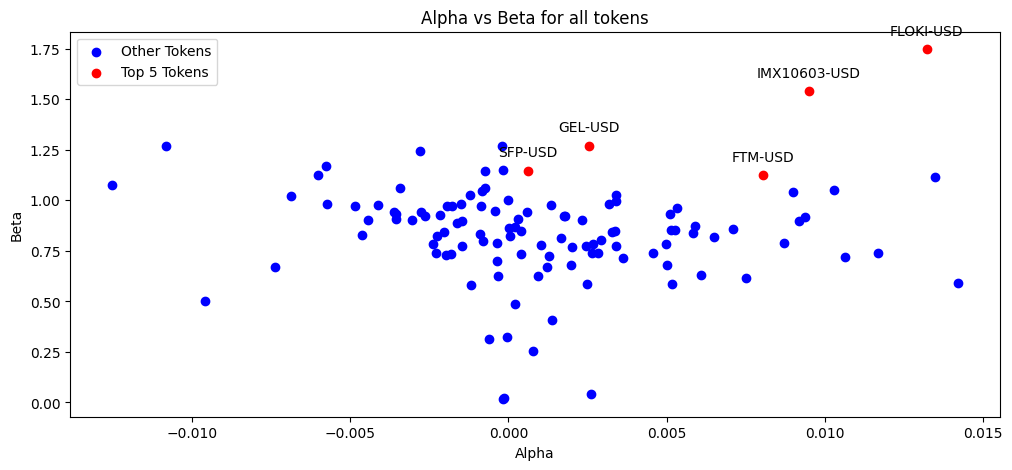

In [10]:
plt = show_alpha_vs_beta(high_beta_positive_alpha, df_2021)
plt.show()

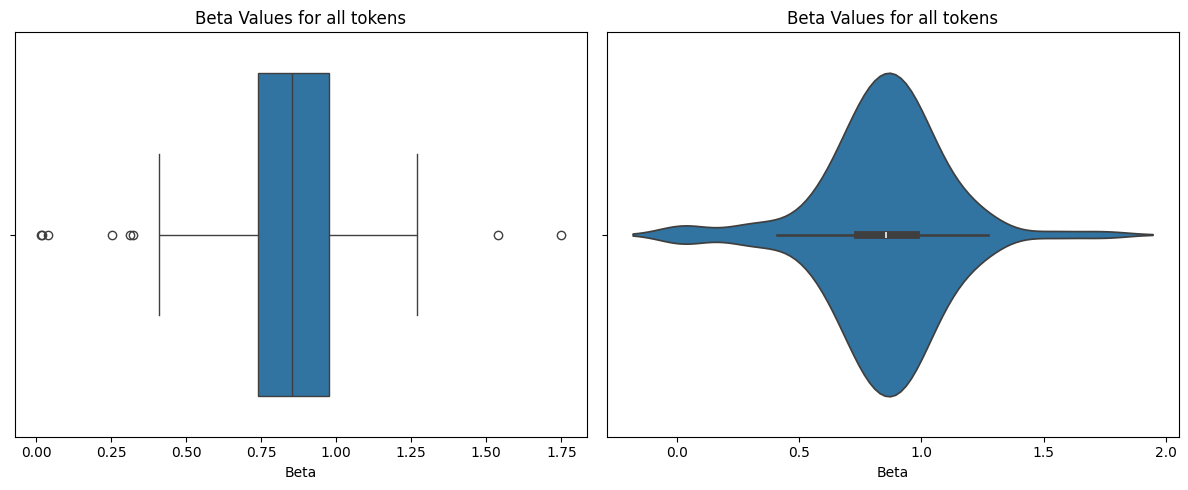

In [11]:
plt = show_beta_distribution_box_plot(df_2021)
plt.show()

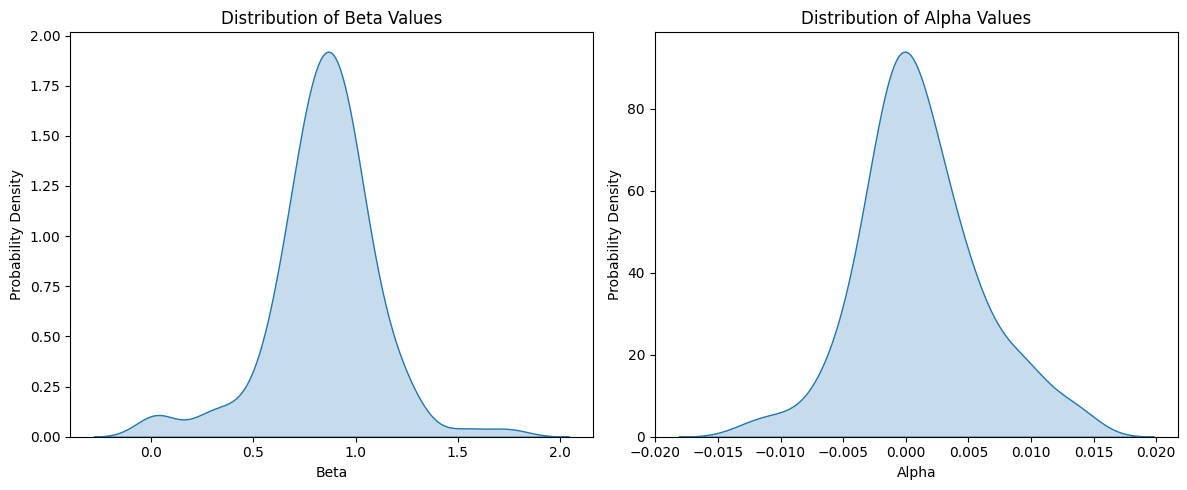

In [12]:
plt = show_kde(df_2021)
plt.show()

# EDA of Beta to ETH - no rolling (2022)

In [13]:
# Fetch data from 01.01.2022 to 01.01.2023 (1 full year)
alpha_2022 = create_alpha(period_start=2022, period_end=2023, use_rolling=False)

15-08-2024 09:31:43 - ONDO-USD: Data doesn't exist for startDate = 1640995200, endDate = 1672531200
15-08-2024 09:31:43 - AEVO-USD: Data doesn't exist for startDate = 1640995200, endDate = 1672531200
15-08-2024 09:31:43 - NOT-USD: Data doesn't exist for startDate = 1640995200, endDate = 1672531200
15-08-2024 09:31:43 - WIF-USD: Data doesn't exist for startDate = 1640995200, endDate = 1672531200
15-08-2024 09:31:43 - SUI20947-USD: Data doesn't exist for startDate = 1640995200, endDate = 1672531200
15-08-2024 09:31:43 - MANTA-USD: Data doesn't exist for startDate = 1640995200, endDate = 1672531200
15-08-2024 09:31:43 - ENA-USD: Data doesn't exist for startDate = 1640995200, endDate = 1672531200
15-08-2024 09:31:43 - MOG-USD: Data doesn't exist for startDate = 1640995200, endDate = 1672531200
15-08-2024 09:31:43 - SEI-USD: Data doesn't exist for startDate = 1640995200, endDate = 1672531200
15-08-2024 09:31:43 - JTO-USD: Data doesn't exist for startDate = 1640995200, endDate = 1672531200
1

In [14]:
df_2022 = alpha_2022.get_df()

In [15]:
df_2022

,Beta,Alpha
BTC-USD,0.661923,-8.673143e-04
ETH-USD,1.000000,-4.507513e-19
LTC-USD,0.816937,4.419687e-04
XMR-USD,0.722939,6.682192e-04
XRP-USD,0.743676,-1.726988e-04
...,...,...
SHIB-USD,0.809756,-1.453672e-03
BONK-USD,NaN,NaN
FLOKI-USD,1.074900,-4.020552e-03
BTT-USD,0.205333,-2.101121e-02


In [16]:
high_beta = df_2022[df_2022['Beta'] > 1]
high_beta_pct = (len(high_beta) / len(df_2022)) * 100

low_beta = df_2022[df_2022['Beta'] < 1]
low_beta_pct = (len(low_beta) / len(df_2022)) * 100

high_beta_positive_alpha = df_2022[(df_2022['Beta'] > 1) & (df_2022['Alpha'] > 0)]
high_beta_positive_alpha_pct = (len(high_beta_positive_alpha) / len(high_beta)) * 100

high_beta_negative_alpha = df_2022[(df_2022['Beta'] > 1) & (df_2022['Alpha'] < 0)]
high_beta_negative_alpha_pct = (len(high_beta_negative_alpha) / len(high_beta)) * 100

In [17]:
print(f"There are {len(high_beta)} (about {high_beta_pct:.1f}%) tokens which betas are above 1")
high_beta.sort_values(by='Beta', ascending=False)

There are 34 (about 26.8%) tokens which betas are above 1


,Beta,Alpha
LUNC-USD,1.576644,-0.031757
LDO-USD,1.297140,0.000274
APT21794-USD,1.290718,-0.008208
RUNE-USD,1.273657,-0.000853
SWISE-USD,1.266974,0.001592
CRV-USD,1.224909,-0.003054
GMX11857-USD,1.214818,0.006380
RNDR-USD,1.195716,-0.003195
SNX-USD,1.163001,-0.000166
GMT18069-USD,1.157508,0.006553


In [18]:
print(f"There are {len(low_beta)} (about {low_beta_pct:.1f}%) tokens which betas are below 1")
low_beta.sort_values(by='Beta', ascending=False)

There are 92 (about 72.4%) tokens which betas are below 1


,Beta,Alpha
ETH-USD,1.000000,-4.507513e-19
DYDX-USD,0.999138,-2.410128e-03
FLOW-USD,0.998191,-4.106932e-03
RETH-USD,0.995409,1.535498e-04
LPT-USD,0.991943,-2.978822e-03
...,...,...
LEO-USD,0.207844,4.828139e-04
BTT-USD,0.205333,-2.101121e-02
FRAX-USD,0.021091,7.314419e-05
WLD-USD,0.018509,7.564849e-05


In [19]:
print(f"There are {len(high_beta_positive_alpha)} (about {high_beta_positive_alpha_pct:.1f}%) tokens which betas are above 1 and which alphas are positive")
high_beta_positive_alpha.sort_values(by='Beta', ascending=False)

There are 7 (about 20.6%) tokens which betas are above 1 and which alphas are positive


,Beta,Alpha
LDO-USD,1.297140,0.000274
SWISE-USD,1.266974,0.001592
GMX11857-USD,1.214818,0.006380
GMT18069-USD,1.157508,0.006553
MATIC-USD,1.136365,0.000147
RPL-USD,1.115244,0.001502
ETC-USD,1.043352,0.001089


In [20]:
print(f"There are {len(high_beta_negative_alpha)} (about {high_beta_negative_alpha_pct:.1f}%) tokens which betas are above 1 and which alphas are negative")
high_beta_negative_alpha.sort_values(by='Beta', ascending=False)

There are 27 (about 79.4%) tokens which betas are above 1 and which alphas are negative


,Beta,Alpha
LUNC-USD,1.576644,-0.031757
APT21794-USD,1.290718,-0.008208
RUNE-USD,1.273657,-0.000853
CRV-USD,1.224909,-0.003054
RNDR-USD,1.195716,-0.003195
SNX-USD,1.163001,-0.000166
SOL-USD,1.155317,-0.004358
AAVE-USD,1.140606,-0.000926
ENS-USD,1.123412,-0.000056
GEL-USD,1.123265,-0.004128


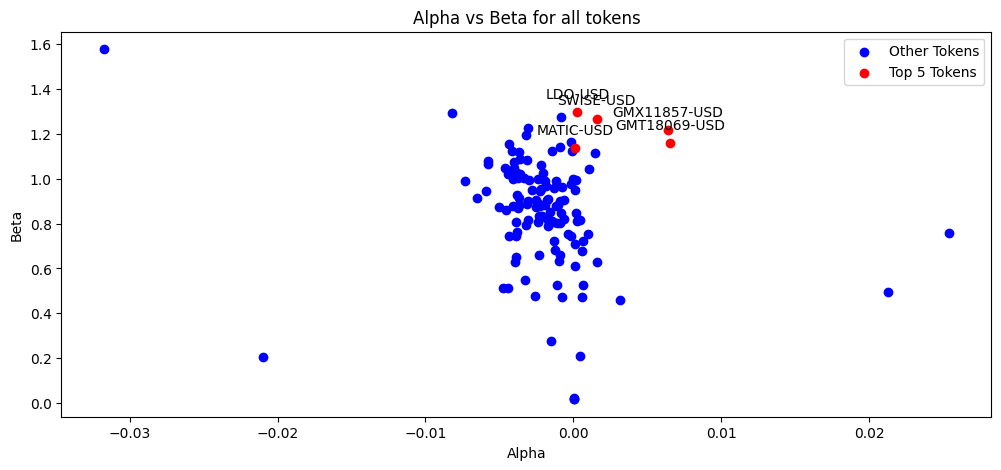

In [21]:
plt = show_alpha_vs_beta(high_beta_positive_alpha, df_2022)
plt.show()

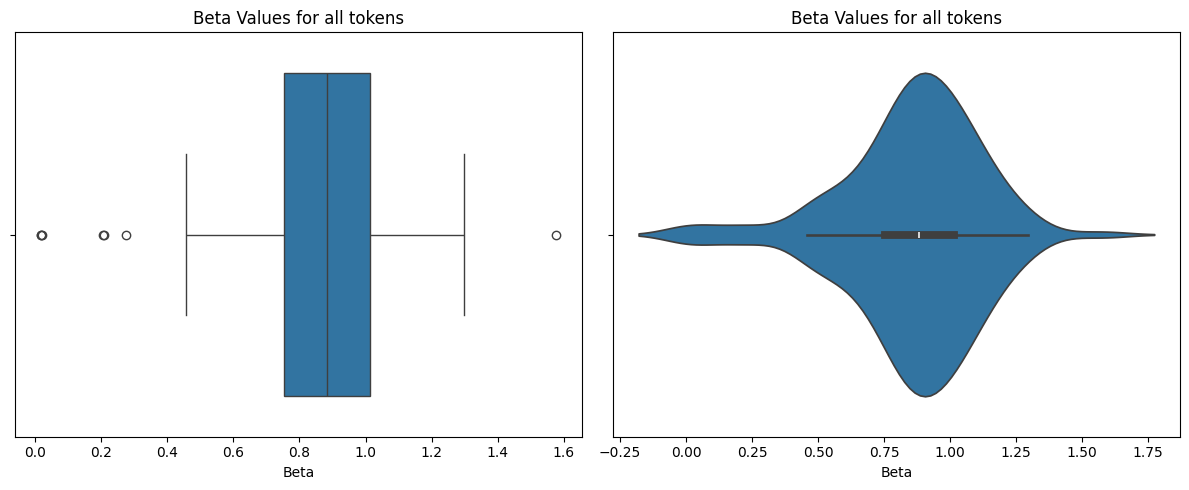

In [22]:
plt = show_beta_distribution_box_plot(df_2022)
plt.show()

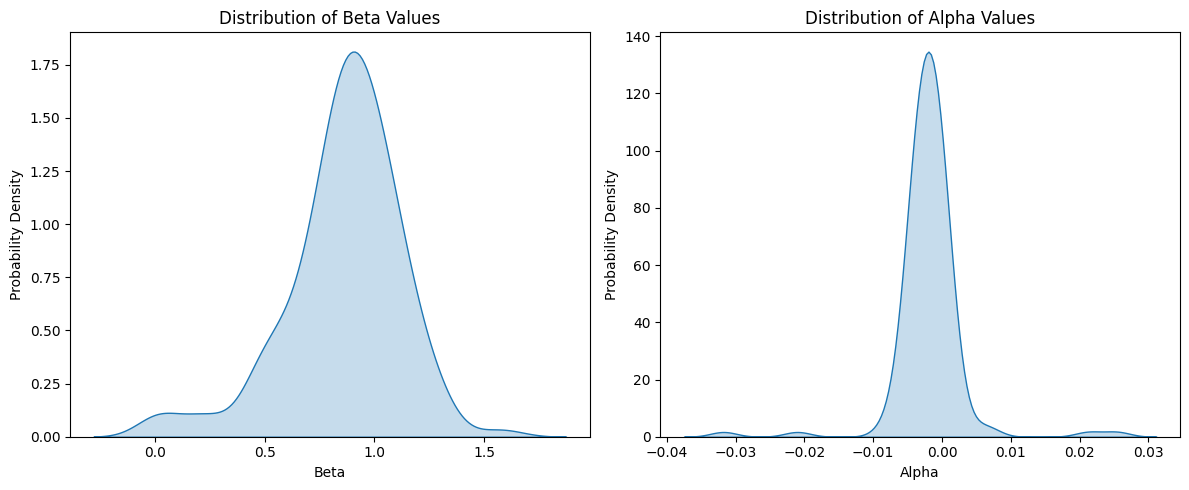

In [23]:
plt = show_kde(df_2022)
plt.show()

# EDA of Beta to ETH - no rolling (2023)

In [24]:
# Fetch data from 01.01.2023 to 01.01.2024 (1 full year)
alpha_2023 = create_alpha(period_start=2023, period_end=2024, use_rolling=False)

In [25]:
df_2023 = alpha_2023.get_df()

In [26]:
df_2023

,Beta,Alpha
BTC-USD,0.733668,1.137810e-03
ETH-USD,1.000000,-1.596469e-18
LTC-USD,0.816119,-1.169603e-03
XMR-USD,0.416148,-5.193367e-04
XRP-USD,0.711518,-4.062371e-05
...,...,...
FLOKI-USD,1.499001,2.512194e-03
BTT-USD,0.469851,-1.141929e-03
MOG-USD,0.872802,-3.552915e-04
ENA-USD,1.307905,-1.237271e-03


In [27]:
high_beta = df_2023[df_2023['Beta'] > 1]
high_beta_pct = (len(high_beta) / len(df_2023)) * 100

low_beta = df_2023[df_2023['Beta'] < 1]
low_beta_pct = (len(low_beta) / len(df_2023)) * 100

high_beta_positive_alpha = df_2023[(df_2023['Beta'] > 1) & (df_2023['Alpha'] > 0)]
high_beta_positive_alpha_pct = (len(high_beta_positive_alpha) / len(high_beta)) * 100

high_beta_negative_alpha = df_2023[(df_2023['Beta'] > 1) & (df_2023['Alpha'] < 0)]
high_beta_negative_alpha_pct = (len(high_beta_negative_alpha) / len(high_beta)) * 100

In [28]:
print(f"There are {len(high_beta)} (about {high_beta_pct:.1f}%) tokens which betas are above 1")
high_beta.sort_values(by='Beta', ascending=False)

There are 70 (about 46.7%) tokens which betas are above 1


,Beta,Alpha
POPCAT28782-USD,2.708156,0.014550
WIF-USD,1.886660,0.009392
ORDI-USD,1.596636,0.000069
FLOKI-USD,1.499001,0.002512
BRETT29743-USD,1.434806,0.008158
...,...,...
ENJ-USD,1.027358,-0.002332
APE18876-USD,1.020861,-0.004508
APT21794-USD,1.009580,-0.000184
AVAX-USD,1.007278,-0.000220


In [29]:
print(f"There are {len(low_beta)} (about {low_beta_pct:.1f}%) tokens which betas are below 1")
low_beta.sort_values(by='Beta', ascending=False)

There are 79 (about 52.7%) tokens which betas are below 1


,Beta,Alpha
ZIL-USD,0.997628,-0.001614
AAVE-USD,0.994963,-0.000103
LQTY-USD,0.992521,-0.001255
ALGO-USD,0.986027,-0.001972
DOGE-USD,0.978356,-0.000642
...,...,...
WBT-USD,0.246042,0.001277
BDX-USD,0.172125,0.000155
PAXG-USD,0.050264,0.000431
LEO-USD,0.042741,0.000791


In [30]:
print(f"There are {len(high_beta_positive_alpha)} (about {high_beta_positive_alpha_pct:.1f}%) tokens which betas are above 1 and which alphas are positive")
high_beta_positive_alpha.sort_values(by='Beta', ascending=False)

There are 27 (about 38.6%) tokens which betas are above 1 and which alphas are positive


,Beta,Alpha
POPCAT28782-USD,2.708156,0.014550
WIF-USD,1.886660,0.009392
ORDI-USD,1.596636,0.000069
FLOKI-USD,1.499001,0.002512
BRETT29743-USD,1.434806,0.008158
CFX-USD,1.412364,0.001177
PENDLE-USD,1.402285,0.005027
ARKM-USD,1.229392,0.000044
RUNE-USD,1.226927,0.000132
FET-USD,1.222775,0.002209


In [31]:
print(f"There are {len(high_beta_negative_alpha)} (about {high_beta_negative_alpha_pct:.1f}%) tokens which betas are above 1 and which alphas are negative")
high_beta_negative_alpha.sort_values(by='Beta', ascending=False)

There are 43 (about 61.4%) tokens which betas are above 1 and which alphas are negative


,Beta,Alpha
LDO-USD,1.320611,-0.001625
BLUR-USD,1.309367,-0.003276
ENA-USD,1.307905,-0.001237
OP-USD,1.277246,-0.001045
ENS-USD,1.247222,-0.000695
WOO-USD,1.237718,-0.001366
ILV-USD,1.210705,-0.001375
FTM-USD,1.188361,-0.000504
SNX-USD,1.177525,-0.001726
ARB11841-USD,1.167008,-0.002735


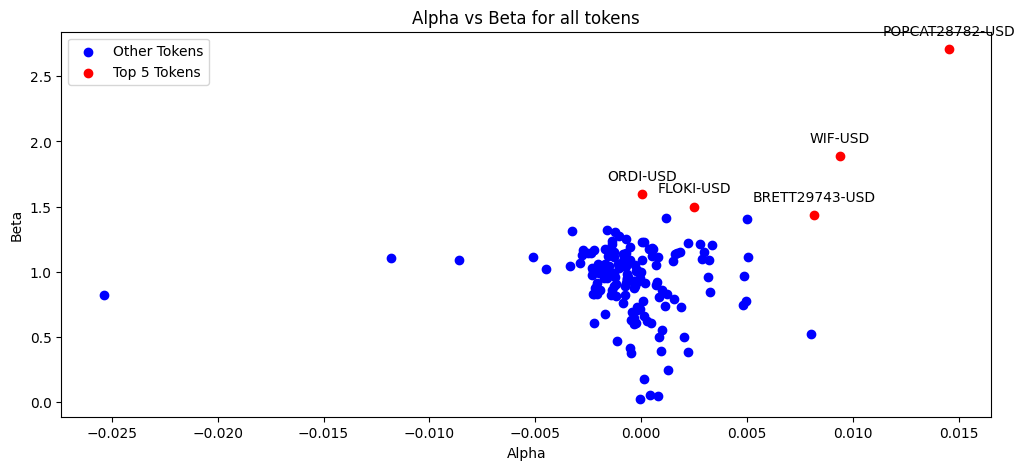

In [32]:
plt = show_alpha_vs_beta(high_beta_positive_alpha, df_2023)
plt.show()

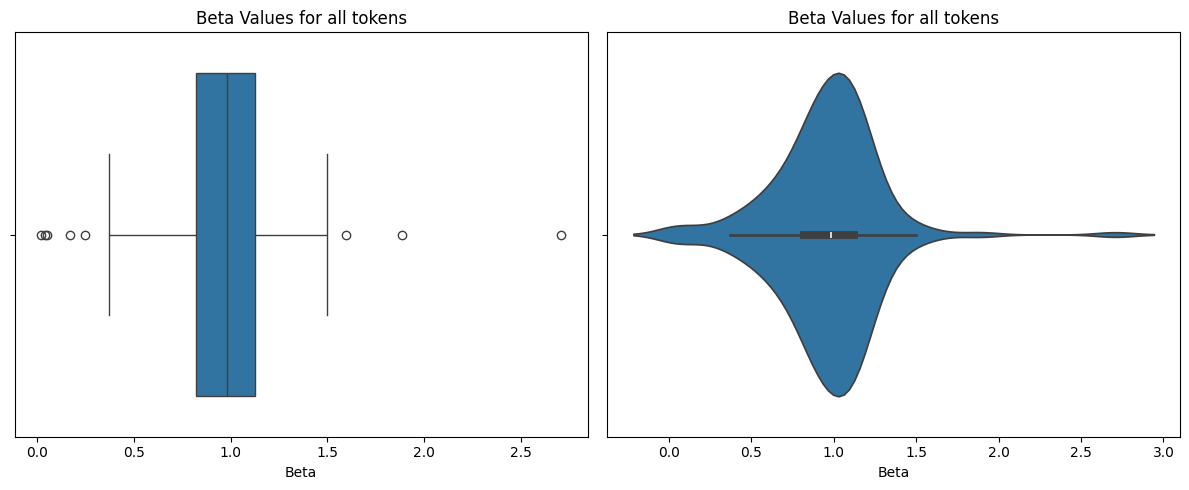

In [33]:
plt = show_beta_distribution_box_plot(df_2023)
plt.show()

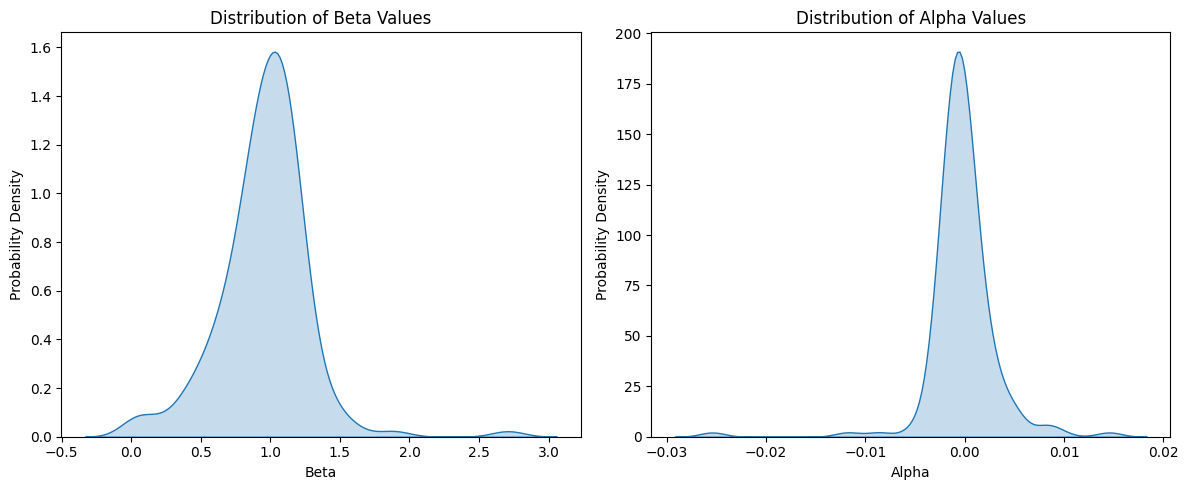

In [34]:
plt = show_kde(df_2023)
plt.show()

# EDA of Beta to ETH - no rolling (2024)

In [35]:
# Fetch data from 01.01.2024 to 01.01.2025 (1 full year)
alpha_2024 = create_alpha(period_start=2024, period_end=2025, use_rolling=False)

15-08-2024 09:32:20 - $RNDR-USD: possibly delisted; No price data found  (1d 2024-08-14 00:00:00+00:00 -> 2025-01-01 00:00:00+00:00)


$RNDR-USD: possibly delisted; No price data found  (1d 2024-08-14 00:00:00+00:00 -> 2025-01-01 00:00:00+00:00)


In [36]:
df_2024 = alpha_2024.get_df()

In [37]:
df_2024

,Beta,Alpha
BTC-USD,0.697513,9.384455e-04
ETH-USD,1.000000,-2.168404e-19
LTC-USD,0.689729,-1.112962e-03
XMR-USD,0.373128,-7.319260e-04
XRP-USD,0.565122,-7.736788e-04
...,...,...
FLOKI-USD,1.461100,4.234096e-03
BTT-USD,0.852397,-1.732848e-03
MOG-USD,1.127655,1.474556e-04
ENA-USD,1.307678,-1.201066e-03


In [38]:
high_beta = df_2024[df_2024['Beta'] > 1]
high_beta_pct = (len(high_beta) / len(df_2024)) * 100

low_beta = df_2024[df_2024['Beta'] < 1]
low_beta_pct = (len(low_beta) / len(df_2024)) * 100

high_beta_positive_alpha = df_2024[(df_2024['Beta'] > 1) & (df_2024['Alpha'] > 0)]
high_beta_positive_alpha_pct = (len(high_beta_positive_alpha) / len(high_beta)) * 100

high_beta_negative_alpha = df_2024[(df_2024['Beta'] > 1) & (df_2024['Alpha'] < 0)]
high_beta_negative_alpha_pct = (len(high_beta_negative_alpha) / len(high_beta)) * 100

In [39]:
print(f"There are {len(high_beta)} (about {high_beta_pct:.1f}%) tokens which betas are above 1")
high_beta.sort_values(by='Beta', ascending=False)

There are 66 (about 44.0%) tokens which betas are above 1


,Beta,Alpha
POPCAT28782-USD,2.665526,1.603109e-02
WIF-USD,1.890728,7.947078e-03
BONK-USD,1.473515,-3.029498e-04
FLOKI-USD,1.461100,4.234096e-03
BRETT29743-USD,1.435237,8.193321e-03
...,...,...
AVAX-USD,1.013798,-3.709228e-03
JTO-USD,1.008739,1.641891e-04
ZIL-USD,1.005210,-3.305402e-03
IOTA-USD,1.002981,-4.430253e-03


In [40]:
print(f"There are {len(low_beta)} (about {low_beta_pct:.1f}%) tokens which betas are below 1")
low_beta.sort_values(by='Beta', ascending=False)

There are 84 (about 56.0%) tokens which betas are below 1


,Beta,Alpha
MINA-USD,0.998715,-0.006322
GNO-USD,0.997231,-0.001148
AXS-USD,0.987415,-0.003534
SAND-USD,0.982448,-0.004370
RON14101-USD,0.981455,-0.001371
...,...,...
WBT-USD,0.179140,0.002707
BDX-USD,0.103369,0.000941
PAXG-USD,0.049587,0.000798
LEO-USD,0.031992,0.001685


In [41]:
print(f"There are {len(high_beta_positive_alpha)} (about {high_beta_positive_alpha_pct:.1f}%) tokens which betas are above 1 and which alphas are positive")
high_beta_positive_alpha.sort_values(by='Beta', ascending=False)

There are 18 (about 27.3%) tokens which betas are above 1 and which alphas are positive


,Beta,Alpha
POPCAT28782-USD,2.665526,0.016031
WIF-USD,1.890728,0.007947
FLOKI-USD,1.461100,0.004234
BRETT29743-USD,1.435237,0.008193
ENS-USD,1.421673,0.002006
CKB-USD,1.367766,0.002300
ARKM-USD,1.310163,0.001881
PENDLE-USD,1.253293,0.002619
FET-USD,1.213975,0.000033
AR-USD,1.147357,0.002546


In [42]:
print(f"There are {len(high_beta_negative_alpha)} (about {high_beta_negative_alpha_pct:.1f}%) tokens which betas are above 1 and which alphas are negative")
high_beta_negative_alpha.sort_values(by='Beta', ascending=False)

There are 48 (about 72.7%) tokens which betas are above 1 and which alphas are negative


,Beta,Alpha
BONK-USD,1.473515,-3.029498e-04
ENA-USD,1.307678,-1.201066e-03
ORDI-USD,1.295070,-4.810674e-03
WLD-USD,1.234610,-4.313753e-03
BEAM28298-USD,1.210654,-2.151623e-03
THETA-USD,1.206387,-1.099563e-03
RUNE-USD,1.193413,-2.029176e-03
LDO-USD,1.171576,-5.092667e-03
WOO-USD,1.165232,-5.457222e-03
CFX-USD,1.161764,-1.689234e-03


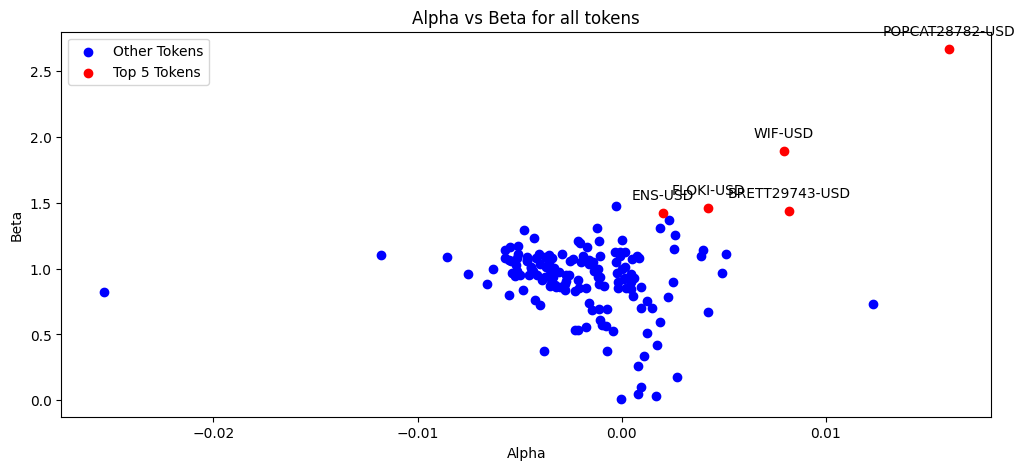

In [43]:
plt = show_alpha_vs_beta(high_beta_positive_alpha, df_2024)
plt.show()

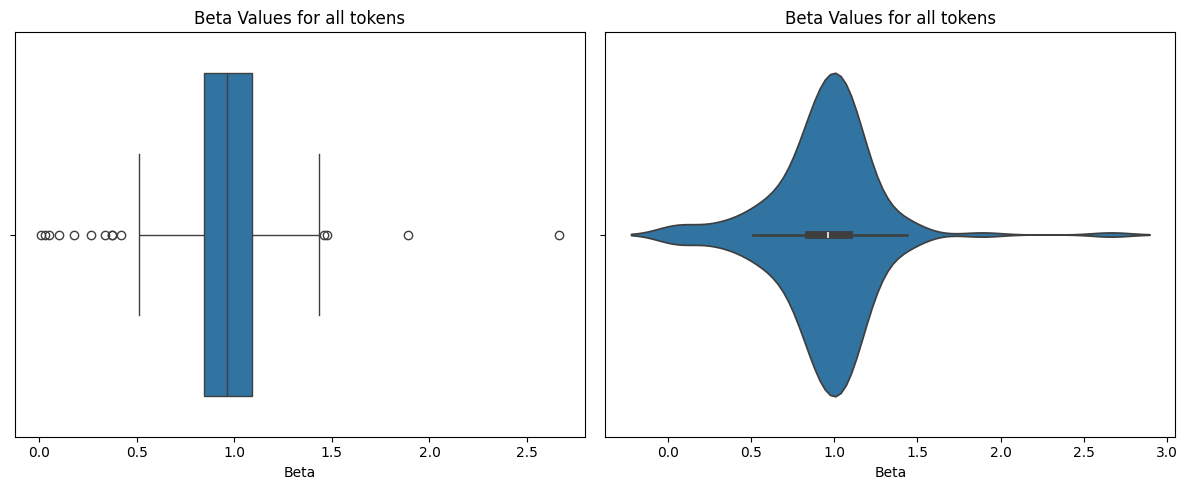

In [44]:
plt = show_beta_distribution_box_plot(df_2024)
plt.show()

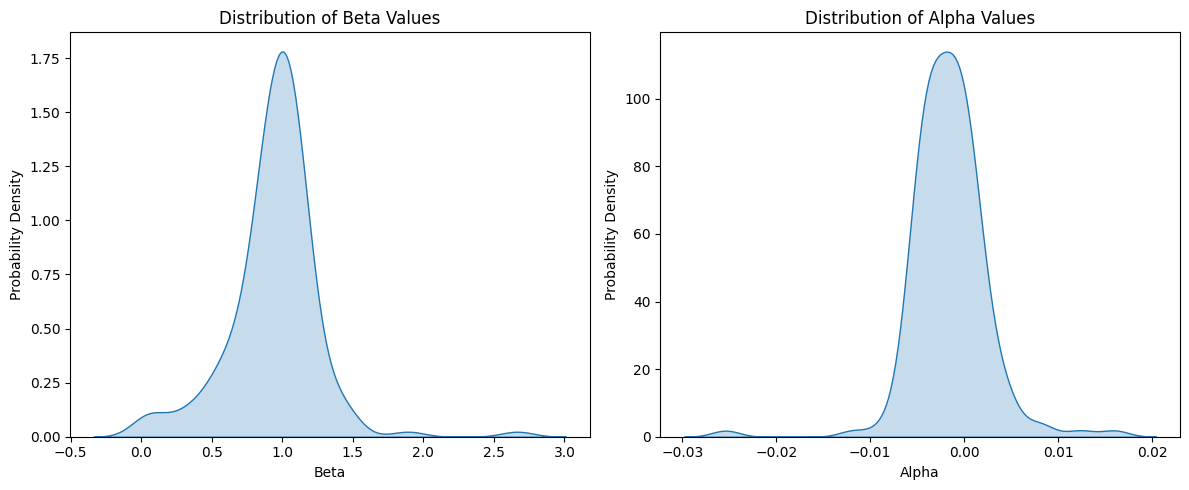

In [45]:
plt = show_kde(df_2024)
plt.show()

# EDA of Beta for ETH using data from 2021, 2022, 2023, 2024.

In [46]:
dfs = [df_2021, df_2022, df_2023, df_2024]
labels=["Full Period - 2021", "Full Period - 2022", "Full Period - 2023", "Full Period - 2024"]

combined_df = pd.concat(dfs, keys=labels).reset_index(level=1, drop=True).reset_index()
combined_df.rename(columns={"index": "Dataset"}, inplace=True)

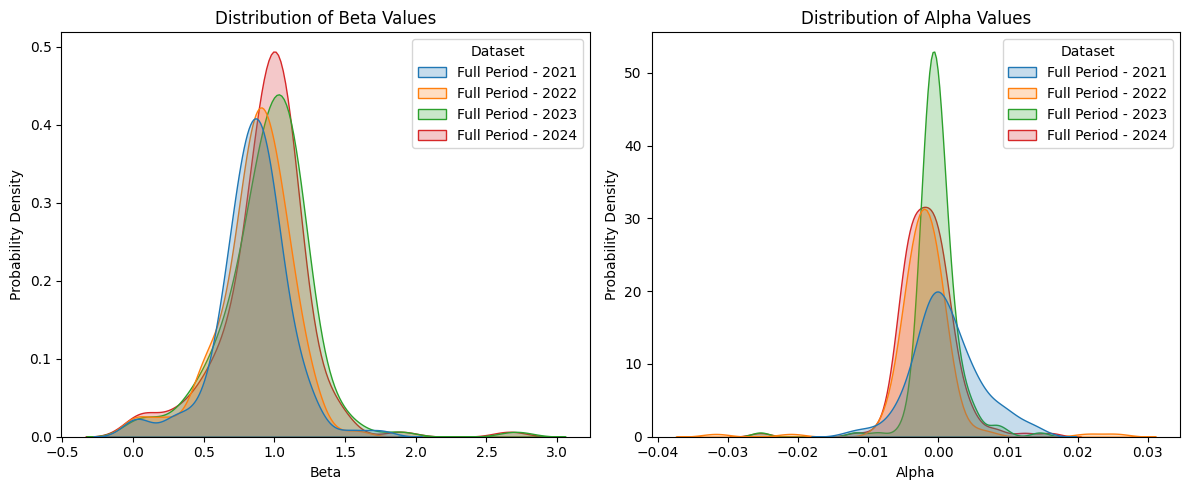

In [47]:
plt = show_kde(combined_df, hue='Dataset')
plt.show()

In [48]:
for index, df in enumerate(dfs):
    print(f"Mean value for Beta `{labels[index]}` is {df['Beta'].mean()}")
    print(f"Median value for Beta `{labels[index]}` is {df['Beta'].median()}")
    print(f"Variance value for Beta `{labels[index]}` is {df['Beta'].var()}")
    print("=======================================================")

Mean value for Beta `Full Period - 2021` is 0.8463807789133192
Median value for Beta `Full Period - 2021` is 0.8541938896289999
Variance value for Beta `Full Period - 2021` is 0.06539017744097117
Mean value for Beta `Full Period - 2022` is 0.859504770106007
Median value for Beta `Full Period - 2022` is 0.8837130498821231
Variance value for Beta `Full Period - 2022` is 0.06704796221402713
Mean value for Beta `Full Period - 2023` is 0.9542899171185281
Median value for Beta `Full Period - 2023` is 0.9821918498275951
Variance value for Beta `Full Period - 2023` is 0.10220837776733174
Mean value for Beta `Full Period - 2024` is 0.9396190972161472
Median value for Beta `Full Period - 2024` is 0.9648887280315532
Variance value for Beta `Full Period - 2024` is 0.09858116288353812


In [49]:
for index, df in enumerate(dfs):
    print(f"Mean value for Alpha `{labels[index]}` is {df['Alpha'].mean()}")
    print(f"Median value for Alpha `{labels[index]}` is {df['Alpha'].median()}")
    print(f"Variance value for Alpha `{labels[index]}` is {df['Alpha'].var()}")
    print("=======================================================")

Mean value for Alpha `Full Period - 2021` is 0.0011406984958200847
Median value for Alpha `Full Period - 2021` is 0.0003885966742510925
Variance value for Alpha `Full Period - 2021` is 2.3391879627379325e-05
Mean value for Alpha `Full Period - 2022` is -0.0019105115676110696
Median value for Alpha `Full Period - 2022` is -0.0019234930018432528
Variance value for Alpha `Full Period - 2022` is 2.5373168490558923e-05
Mean value for Alpha `Full Period - 2023` is -0.0002718578296554671
Median value for Alpha `Full Period - 2023` is -0.0004510140147960295
Variance value for Alpha `Full Period - 2023` is 1.1787606047358905e-05
Mean value for Alpha `Full Period - 2024` is -0.0015895725058803262
Median value for Alpha `Full Period - 2024` is -0.001658606302152062
Variance value for Alpha `Full Period - 2024` is 1.6223126835268397e-05


# EDA of Beta to ETH - with 60 day rolling (2023 & 2024)

In [50]:
alpha = create_alpha(use_rolling=True, window=60)

In [51]:
beta_data = {}
alpha_data = {}

for inst in alpha.insts:
    beta_data[inst] = alpha.dfs[inst]["beta_eth"]
    alpha_data[inst] = alpha.dfs[inst]["alpha_eth"]

beta_df = pd.concat(beta_data, axis=1)
beta_df.index = pd.to_datetime(beta_df.index)

alpha_df = pd.concat(alpha_data, axis=1)
alpha_df.index = pd.to_datetime(alpha_df.index)

In [52]:
# Display the last few rows of the beta eth data
beta_df.tail()

,BTC-USD,ETH-USD,LTC-USD,XMR-USD,XRP-USD,ADA-USD,DOGE-USD,SOL-USD,DOT-USD,ATOM-USD,...,GLM-USD,HOT-USD,SHIB-USD,NOT-USD,BONK-USD,FLOKI-USD,BTT-USD,MOG-USD,ENA-USD,BDX-USD
datetime,,,,,,,,,,,,,,,,,,,,,
2024-08-11 00:00:00+00:00,0.716287,1.0,0.834985,0.381266,0.416980,0.835883,0.973280,1.016353,0.771657,0.687319,...,0.916400,0.950496,0.738648,1.418318,1.306318,1.344448,0.000000,3.541625,1.548996,-0.192171
2024-08-12 00:00:00+00:00,0.683134,1.0,0.821488,0.359373,0.407998,0.812375,0.976470,0.977663,0.738410,0.675483,...,0.864596,0.939157,0.758882,1.369430,1.257149,1.315748,0.000000,3.347558,1.566716,-0.139876
2024-08-13 00:00:00+00:00,0.683348,1.0,0.821875,0.360809,0.408552,0.814238,0.980936,0.980726,0.741287,0.679570,...,0.867201,0.940064,0.762821,1.356886,1.264518,1.317869,0.000000,3.349243,1.562587,-0.152079
2024-08-14 00:00:00+00:00,0.691812,1.0,0.818647,0.345188,0.403041,0.819960,0.988236,0.986317,0.746705,0.687439,...,0.865476,0.946287,0.748934,1.338001,1.280938,1.328061,0.000000,3.379138,1.558477,-0.090207
2024-08-15 00:00:00+00:00,0.693252,1.0,0.821736,0.344934,0.407474,0.820249,0.989864,0.982082,0.740598,0.686625,...,0.867309,0.945029,0.753613,1.356453,1.274788,1.326315,0.035924,3.375508,1.556592,-0.074438


In [53]:
# Display the last few rows of the beta eth data
alpha_df.tail()

,BTC-USD,ETH-USD,LTC-USD,XMR-USD,XRP-USD,ADA-USD,DOGE-USD,SOL-USD,DOT-USD,ATOM-USD,...,GLM-USD,HOT-USD,SHIB-USD,NOT-USD,BONK-USD,FLOKI-USD,BTT-USD,MOG-USD,ENA-USD,BDX-USD
datetime,,,,,,,,,,,,,,,,,,,,,
2024-08-11 00:00:00+00:00,0.001462,-6.580820e-20,0.000070,-0.001108,0.004271,-0.000167,-0.000845,0.004094,-0.002477,-0.003881,...,-0.001082,-0.001905,-0.004678,-0.000788,0.000187,-0.003003,0.000000,0.019614,-0.006585,0.003592
2024-08-12 00:00:00+00:00,0.000793,1.910078e-19,-0.000904,-0.000758,0.004576,-0.000347,-0.000554,0.003841,-0.002472,-0.003651,...,-0.001216,-0.001968,-0.003701,-0.001441,0.000691,-0.003160,0.000000,0.013484,-0.006152,0.004212
2024-08-13 00:00:00+00:00,0.001453,-5.403967e-19,0.000106,-0.000891,0.004970,0.000246,0.000166,0.004543,-0.001939,-0.002990,...,-0.000851,-0.001477,-0.002734,-0.003668,0.002283,-0.002639,0.000000,0.014095,-0.005706,0.001453
2024-08-14 00:00:00+00:00,0.001374,-6.898266e-19,0.000436,-0.000972,0.004434,0.000495,0.000034,0.004627,-0.002191,-0.003370,...,-0.001305,-0.001171,-0.003114,-0.003452,0.002338,-0.002358,0.000000,0.016439,-0.006292,0.005166
2024-08-15 00:00:00+00:00,0.001457,4.082393e-19,0.000905,-0.000656,0.004601,0.000807,0.000478,0.004198,-0.002283,-0.003429,...,-0.001024,-0.001165,-0.003304,-0.002517,0.002166,-0.002467,-0.004884,0.020574,-0.006424,0.006370


In [54]:
beta_last_values = beta_df.iloc[-1]
alpha_last_values = alpha_df.iloc[-1]

data = {
    token: {'Beta': beta_last_values[token], 'Alpha': alpha_last_values[token]} 
    for token in beta_last_values.index
}

df = pd.DataFrame.from_dict(data, orient='index')

In [55]:
df

,Beta,Alpha
BTC-USD,0.693252,1.457468e-03
ETH-USD,1.000000,4.082393e-19
LTC-USD,0.821736,9.053655e-04
XMR-USD,0.344934,-6.564047e-04
XRP-USD,0.407474,4.600584e-03
...,...,...
FLOKI-USD,1.326315,-2.466597e-03
BTT-USD,0.035924,-4.884320e-03
MOG-USD,3.375508,2.057447e-02
ENA-USD,1.556592,-6.424362e-03


In [56]:
high_beta = df[df['Beta'] > 1]
high_beta_pct = (len(high_beta) / len(df)) * 100

low_beta = df[df['Beta'] < 1]
low_beta_pct = (len(low_beta) / len(df)) * 100

high_beta_positive_alpha = df[(df['Beta'] > 1) & (df['Alpha'] > 0)]
high_beta_positive_alpha_pct = (len(high_beta_positive_alpha) / len(high_beta)) * 100

high_beta_negative_alpha = df[(df['Beta'] > 1) & (df['Alpha'] < 0)]
high_beta_negative_alpha_pct = (len(high_beta_negative_alpha) / len(high_beta)) * 100

In [57]:
print(f"There are {len(high_beta)} (about {high_beta_pct:.1f}%) tokens which betas are above 1")
high_beta.sort_values(by='Beta', ascending=False)

There are 70 (about 46.7%) tokens which betas are above 1


,Beta,Alpha
MOG-USD,3.375508,2.057447e-02
POPCAT28782-USD,1.828363,1.866259e-02
ENS-USD,1.630616,4.313820e-03
BRETT29743-USD,1.576537,-1.854013e-03
ENA-USD,1.556592,-6.424362e-03
...,...,...
UNI7083-USD,1.006676,-5.403727e-03
APT21794-USD,1.006456,2.414843e-03
IOTX-USD,1.006069,-1.682207e-03
AVAX-USD,1.003504,-8.629497e-04


In [58]:
print(f"There are {len(low_beta)} (about {low_beta_pct:.1f}%) tokens which betas are below 1")
low_beta.sort_values(by='Beta', ascending=False)

There are 79 (about 52.7%) tokens which betas are below 1


,Beta,Alpha
APE18876-USD,0.997498,-0.004853
ARKM-USD,0.996935,-0.004685
DOGE-USD,0.989864,0.000478
AXS-USD,0.987443,-0.000540
SOL-USD,0.982082,0.004198
...,...,...
PAXG-USD,0.082648,0.001311
BTT-USD,0.035924,-0.004884
LEO-USD,0.007495,-0.000014
FRAX-USD,0.001775,-0.000012


In [59]:
print(f"There are {len(high_beta_positive_alpha)} (about {high_beta_positive_alpha_pct:.1f}%) tokens which betas are above 1 and which alphas are positive")
high_beta_positive_alpha.sort_values(by='Beta', ascending=False)

There are 28 (about 40.0%) tokens which betas are above 1 and which alphas are positive


,Beta,Alpha
MOG-USD,3.375508,2.057447e-02
POPCAT28782-USD,1.828363,1.866259e-02
ENS-USD,1.630616,4.313820e-03
SUI20947-USD,1.503415,6.842727e-03
SEI-USD,1.400764,6.788364e-04
RAY-USD,1.398371,7.233613e-03
MPL-USD,1.358109,8.921126e-03
AIOZ-USD,1.348421,1.261524e-03
CFX-USD,1.324420,1.181617e-03
JTO-USD,1.306676,3.731352e-03


In [60]:
print(f"There are {len(high_beta_negative_alpha)} (about {high_beta_negative_alpha_pct:.1f}%) tokens which betas are above 1 and which alphas are negative")
high_beta_negative_alpha.sort_values(by='Beta', ascending=False)

There are 42 (about 60.0%) tokens which betas are above 1 and which alphas are negative


,Beta,Alpha
BRETT29743-USD,1.576537,-0.001854
ENA-USD,1.556592,-0.006424
AEVO-USD,1.440499,-0.002021
WIF-USD,1.430242,-0.001167
RBN-USD,1.429459,-0.001998
W-USD,1.415049,-0.004652
ORDI-USD,1.392276,-0.000642
NOT-USD,1.356453,-0.002517
CKB-USD,1.342614,-0.000800
FLOKI-USD,1.326315,-0.002467


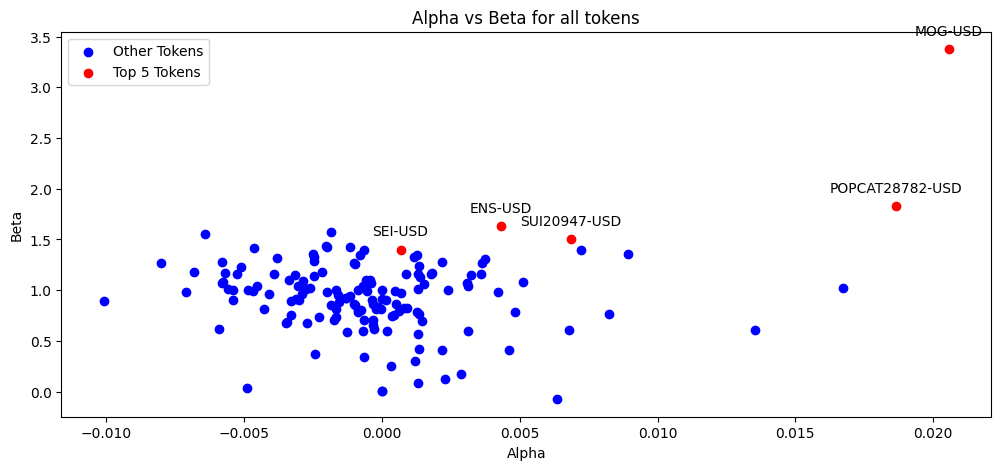

In [61]:
plt = show_alpha_vs_beta(high_beta_positive_alpha, df)
plt.show()

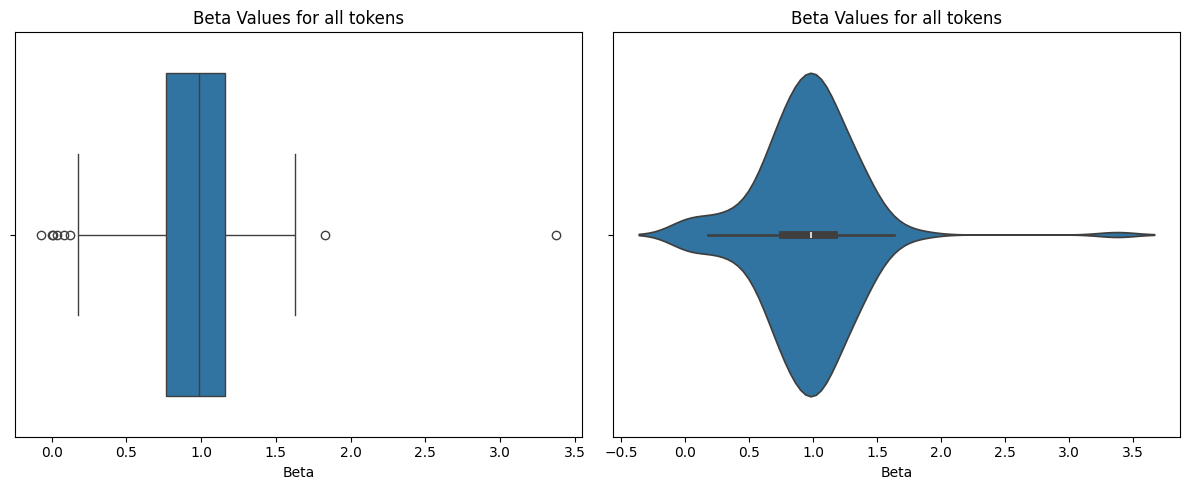

In [62]:
plt = show_beta_distribution_box_plot(df)
plt.show()

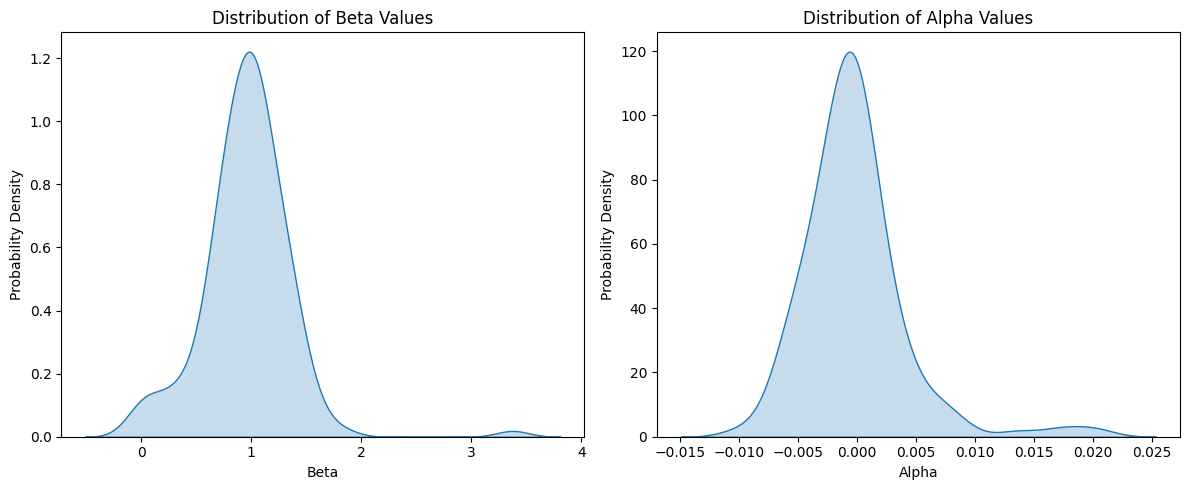

In [63]:
plt = show_kde(df)
plt.show()

In [64]:
top_5_tokens = high_beta_positive_alpha.nlargest(5, "Beta").index.tolist()

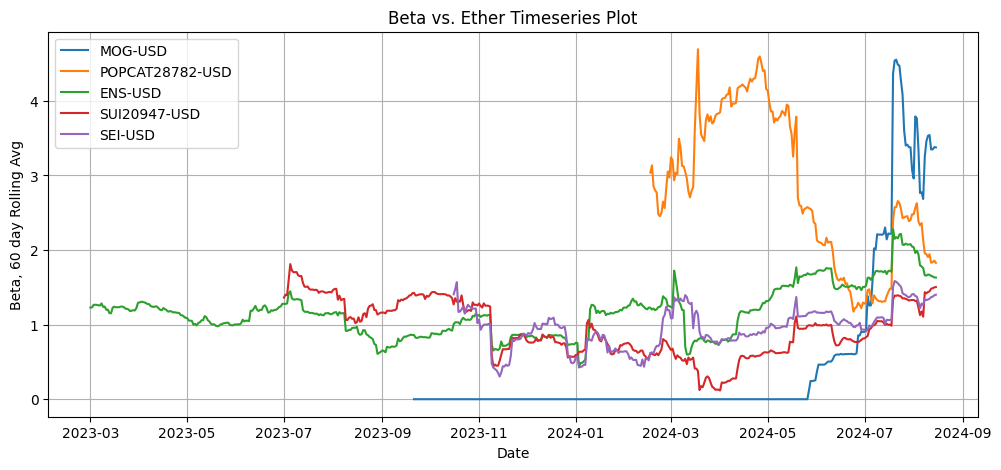

In [65]:
plt = show_timeseries_plot(beta_df, top_5_tokens)

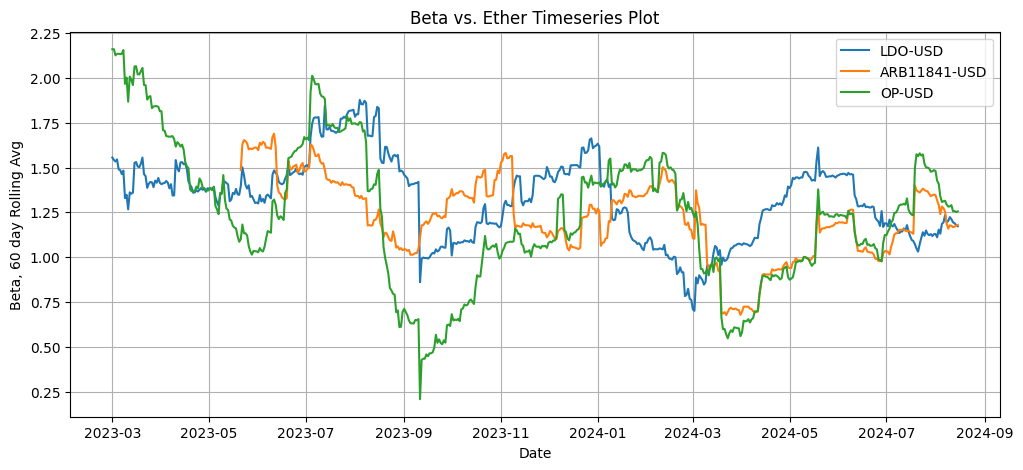

In [66]:
plt = show_timeseries_plot(beta_df, ['LDO-USD', 'ARB11841-USD', 'OP-USD'])